Pedro G.Viegas

# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, let's go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem definition

How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets: 

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout   the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation

The evaluation metric for this competition is the RMLSE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check:https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal from most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?pli=1&gid=1021421956#gid=1021421956

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# Import training and validation sets
df = pd.read_csv ("TrainAndValid.csv", low_memory = False)

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df['SalePrice'][:1000])
plt.show();

In [ ]:
 df.saledate[:1000]

In [ ]:
df.SalePrice.plot.hist()

### Parsing dates 

When we work with time series data, we want to enrich the time & date component as much as possible. 

We can do that by telling pandas which of our column has dates in it using the ` parse_dates` parameter. 



In [ ]:
# Import data again but this time parse dates 
df = pd.read_csv ("TrainAndValid.csv", low_memory = False, parse_dates = ['saledate'])

In [ ]:
df.saledate.dtype

In [ ]:
df.saledate[:1000]

In [209]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,saleDayofWeek,saleDayofYear
205615,1646770,False,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,False,False,False,True,True,False,False
274835,1821514,False,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,False,False,False,False
141296,1505138,False,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,False,False,False,True,True,False,False
212552,1671174,False,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,False,False,False,False
62755,1329056,False,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,False,False,False,True,True,False,False


In [210]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,False,False,False,False,False
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True
Steering_Controls_is_missing,True,False,True,False,True
saleDayofWeek,False,False,False,False,False


In [208]:
df.saledate.head(20)

AttributeError: 'DataFrame' object has no attribute 'saledate'

### Sort DataFrame by saledate

When we're working with time series data, it's a good idea to sort it by date.

In [ ]:
# Sort DataFrame  in date order 
df.sort_values (by = ['saledate'], inplace = True, ascending = True)
df.saledate.head(20)

In [211]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,saleDayofWeek,saleDayofYear
205615,1646770,False,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,False,False,False,True,True,False,False
274835,1821514,False,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,False,False,False,False
141296,1505138,False,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,False,False,False,True,True,False,False
212552,1671174,False,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,False,False,False,False
62755,1329056,False,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,False,False,False,True,True,False,False


### Make a copy the original DataFrame

Here, I'll make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [212]:
# Make a copy
df_tmp = df.copy()
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,saleDayofWeek,saleDayofYear
205615,1646770,False,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,False,False,False,True,True,False,False
274835,1821514,False,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,False,False,False,False
141296,1505138,False,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,False,False,False,True,True,False,False
212552,1671174,False,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,False,False,False,False
62755,1329056,False,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,False,1915521,5266,149,99.0,2001,0.0,0,2101,...,True,True,True,False,False,False,True,True,False,False
412476,6324811,False,1919104,19330,149,99.0,2004,0.0,0,240,...,True,True,True,True,True,True,True,True,False,False
411927,6313029,False,1918416,17244,149,99.0,2004,0.0,0,627,...,True,True,True,True,True,True,True,True,False,False
407124,6266251,False,509560,3357,149,99.0,1993,0.0,0,83,...,True,True,True,True,True,True,True,True,False,False


### Add datetime parameters saledate column

In [ ]:
df_tmp ["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofYear"] = df_tmp.saledate.dt.dayofyear

In [213]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,False,False,False,False,False
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True
Steering_Controls_is_missing,True,False,True,False,True
saleDayofWeek,False,False,False,False,False


In [214]:
df_tmp[:1].saledate.dt.day

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [215]:
# Now we've enriched our DataFrame with date time features, we can remove 'saledate'.
df_tmp.drop("saledate", axis =1, inplace = True)

KeyError: "['saledate'] not found in axis"

In [216]:
# Check the values of different columns
df_tmp. state.value_counts()

state
9     67320
44    53110
5     29761
49    16222
10    14633
20    13322
24    13240
35    12369
13    11540
6     11529
30    11156
33    10636
43    10298
1     10292
38    10234
41     9951
3      9364
32     8639
7      8276
23     7885
25     7178
28     6932
18     6627
17     5351
19     5096
14     4124
4      3933
31     3631
46     3046
45     2801
52     2745
29     2738
48     2353
12     2025
37     1911
22     1831
53     1672
15     1336
26     1336
36     1326
27      866
51      840
16      667
8       510
34      480
2       430
21      347
47      300
42      244
11      118
40       83
39       42
50        2
Name: count, dtype: int64

## 5. Modelling

Thinking well, I've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [217]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor (n_jobs = -1, random_state = 42) 

model.fit(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [218]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 105 entries, SalesID to saleDayofYear
dtypes: bool(51), float64(2), int16(4), int32(3), int64(5), int8(40)
memory usage: 68.9 MB


In [219]:
df_tmp["UsageBand"].dtype

dtype('int8')

In [220]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
saleDayofWeek                   0
saleDayofYear                   0
Length: 105, dtype: int64

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html#data-types-related-functionality

In [ ]:
df_tmp.head().T

In [ ]:
# Find the position of the "UsageBand column"Encontra a posição da coluna "UsageBand"
start_col = df_tmp.columns.get_loc("UsageBand")

# Select all columns from "UsageBand" until the end
cols_to_convert = df_tmp.columns[start_col:]

# Convert each one of these columns to category 
df_tmp[cols_to_convert] = df_tmp[cols_to_convert].astype("category")

In [ ]:
for col in df_tmp.columns:
    if df_tmp[col].dtype.name == 'category':
        df_tmp[col] = df_tmp[col].cat.codes

In [25]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [ ]:
df_tmp.state.cat.categories

In [ ]:
df_tmp.state.cat.codes

Due to Pandas, we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data...

In [24]:
# Checking missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Saving preprocessed data  

In [221]:
# Export current tmp dataframe
df_tmp.to_csv("train_tmp.csv",index = False)

In [27]:
# Import preprocessed data
df_tmp.to_csv = pd.read_csv("train_tmp.csv", low_memory = False)
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [28]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Filling missing values

### Filling numerical missing values first

In [29]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [30]:
df_tmp.ModelID

205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
410879     5266
412476    19330
411927    17244
407124     3357
409203     4701
Name: ModelID, Length: 412698, dtype: int64

In [31]:
# Checking for which numeric columns have null values 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull (content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [32]:
# Filling numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull (content).sum():
            # Adding a binary column which tells us if the data was missing 
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Filling missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [33]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000,),100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(np.float64(100.0),
 np.float64(999100.8991008991),
 np.float64(100.0),
 np.float64(100.0))

In [34]:
hundreds

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10

In [35]:
hundreds_billion

array([       100,        100,        100, ...,        100,        100,
       1000000000], shape=(1001,))

In [222]:
# Let's check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [37]:
# Let's checking to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [38]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers

In [39]:
# Check for columns which are not numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [40]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value 
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [41]:
pd.Categorical(df_tmp['state']).codes + 1

array([44,  9,  9, ...,  5,  5,  5], shape=(412698,), dtype=int8)

In [42]:
pd.Categorical(df_tmp["UsageBand"]).codes + 1

array([1, 1, 1, ..., 1, 1, 1], shape=(412698,), dtype=int8)

In [43]:
df_tmp.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [44]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [45]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [46]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [177]:
len(df_tmp)

412698

In [48]:
%%time
# Instantiate model 
model = RandomForestRegressor(n_jobs=-1, 
                              random_state=42)

# Fitting the model
model.fit(df_tmp.drop("SalePrice", axis =1), df_tmp["SalePrice"])

CPU times: user 1h 3min 24s, sys: 20.5 s, total: 1h 3min 45s
Wall time: 4min 26s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [49]:
# Scoring the model
model.score(df_tmp.drop("SalePrice", axis =1), df_tmp["SalePrice"])

0.9875468079970562

**Question:** Why does not the above metric hold water? (why is not metric reliable)

### Splitting data into train/validation sets

In [50]:
df_tmp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int32

In [178]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [179]:
# Splitting data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear!=2012]

len(df_val), len(df_train)

(11573, 401125)

In [180]:
# Splitting data into X & y
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis = 1), df_val.SalePrice


X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [53]:
y_train

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
393098    29000.0
400217    11000.0
400302    11000.0
400393    18000.0
393123    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function

#### Testing the model on a subset (to tune the hyperparameters)

In [223]:
def show_scores(model):
    train_preds = model.predict(X_train_encoded)
    val_preds = model.predict(X_valid_encoded)
    return {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        #"Training R^2": r2_score(y_train, train_preds),
        #"Valid R^2": r2_score(y_valid, val_preds)
    }

In [224]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original data
X_train_encoded = X_train.copy()
X_valid_encoded = X_valid.copy()

# Encode only object or category dtype columns
label_encoders = {}

for col in X_train.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    # Combine train + valid to handle all categories
    all_values = pd.concat([X_train[col], X_valid[col]], axis=0).astype(str)
    le.fit(all_values)
    
    X_train_encoded[col] = le.transform(X_train[col].astype(str))
    X_valid_encoded[col] = le.transform(X_valid[col].astype(str))
    
    label_encoders[col] = le

In [189]:
model.fit(X_train_encoded, y_train)
show_scores(model)

{'Training MAE': 7645.787505440948, 'Valid MAE': 9173.138034217576}

In [190]:
(X_train.shape[0]*100)/1000000

40.1125

In [185]:
10000*10

100000

In [172]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

# TK - can now use RMSLE from sckit-learn, see: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_log_error.html#sklearn.metrics.root_mean_squared_log_error 
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [169]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=1000)

In [170]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

CPU times: user 5.6 s, sys: 426 ms, total: 6.03 s
Wall time: 1.09 s


RandomForestRegressor(max_samples=1000, n_jobs=-1)

In [191]:
show_scores(model)

{'Training MAE': 7645.787505440948, 'Valid MAE': 9173.138034217576}

### Train a model with the best hyperparameters 

Note: These were found after 100 iterations of RandomizedSearchCV.

In [57]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators = 40,
                                   min_samples_leaf = 1,
                                   min_samples_split = 14,
                                   max_features = 0.5,
                                   n_jobs= -1,
                                   max_samples = None,
                                   random_state = 42) # random state so our results are reproducible
# Fit the ideal model
ideal_model.fit(X_train,y_train)

CPU times: user 8min 53s, sys: 1.66 s, total: 8min 55s
Wall time: 38.5 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [62]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': np.float64(0.14469006962371858),
 'Valid RMSLE': np.float64(0.24524163989538328),
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

### Make predictions on test data

In [161]:
# Import the test data
df_test = pd.read_csv ("Test.csv",
                       low_memory = False,
                       parse_dates = ['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [225]:
# Making predictions on the test dataset
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


In [194]:
model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [195]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [152]:
# Now we've got a function for preprocessing data, let's preprocess the test dataset into the same format as our training dataset.
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [166]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing_is_missing_is_missing,Stick_Length_is_missing_is_missing_is_missing,Thumb_is_missing_is_missing_is_missing,Pattern_Changer_is_missing_is_missing_is_missing,Grouser_Type_is_missing_is_missing_is_missing,Backhoe_Mounting_is_missing_is_missing_is_missing,Blade_Type_is_missing_is_missing_is_missing,Travel_Controls_is_missing_is_missing_is_missing,Differential_Type_is_missing_is_missing_is_missing,Steering_Controls_is_missing_is_missing_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,False,False,False,False,False,False,False,False,False,False
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,False,False,False,False,False,False,False,False,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,False,False,False,False,False,False,False,False,False,False
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,False,False,False,False,False,False,False,False,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,False,False,False,False,False,False,False,False,False,False


In [197]:
# Let's see how the model goes predicting on the test data
model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


### Feature Importance

Since we've built a model which is able to make predictions. The people you share these predictions with (or yourself) might be curious of what parts of the data led to these predictions.

This is where feature importance comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable.

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price?

To find which features were most important of a machine learning model, a good idea is to search something like "[MODEL NAME] feature importance".

Doing this for our RandomForestRegressor leads us to find the feature_importances_ attribute.

Let's check it out.

In [198]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [199]:
# Installing Seaborn package in current environment (if you don't have it)
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrievingdone
Channels:
 - defaults
Platform: linux-64
doneecting package metadata (repodata.json): / 
doneing environment: / 

## Package Plan ##

  environment location: /home/pedroviegas/miniconda3/envs/meu_ambiente

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.4.2           |  py310ha9d4c09_0         126 KB
    contourpy-1.3.1            |  py310hdb19cb5_0         262 KB
    fonttools-4.55.3           |  py310h5eee18b_0         2.4 MB
    kiwisolver-1.4.8           |  py310h6a678d5_0          71 KB
    matplotlib-base-3.10.0     |  py310hbfdbfaf_0         7.3 MB
    mkl-service-2.4.0          |  py310h5eee18b_2          68 KB
    mkl_fft-1.3.11             |  py310h5eee18b_0         198 KB
    mkl_random-1.2.8           |  py310h1128e8f_0         318 KB
    numexpr-2.10.1             |  py310h3c60e43_0         173 KB
    numpy

In [200]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

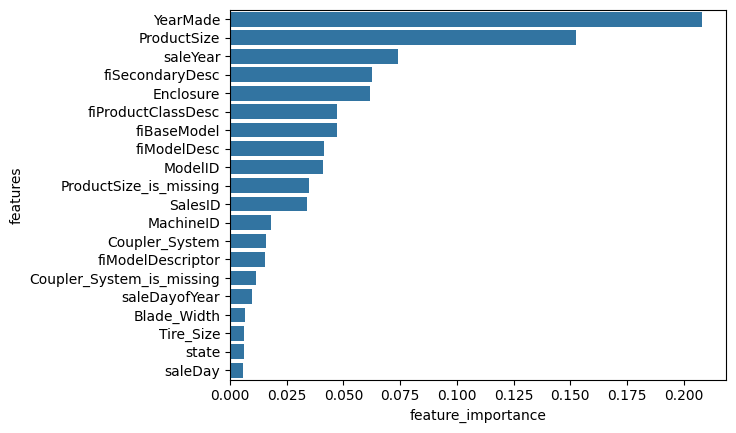

In [201]:
plot_features(X_train.columns, ideal_model.feature_importances_)
plt.show()

In [202]:
sum(ideal_model.feature_importances_)

np.float64(1.0)

In [203]:
df.ProductSize.isna().sum()

np.int64(0)

In [204]:
df.ProductSize.value_counts()

ProductSize
0    216605
4     64342
3     51297
6     27057
5     25721
2     21396
1      6280
Name: count, dtype: int64

In [205]:
df.Turbocharged.value_counts()

Turbocharged
0    331602
1     77111
2      3985
Name: count, dtype: int64

In [206]:
df.Thumb.value_counts()

Thumb
0    310366
3     85074
2      9678
1      7580
Name: count, dtype: int64